In [7]:
import pandas as pd 
from sklearn.datasets import load_digits

# preparing the dataframe

digits = load_digits()
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df['target'] = digits.target


In [10]:
from sklearn.model_selection import train_test_split

# preparing the training and testing sets

X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# choosing the best parameteters 

rs = RandomizedSearchCV(KNeighborsClassifier(), {
        'n_neighbors' : [1, 3, 5, 10, 15, 20, 50, 100],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [1, 10, 30, 50, 100],
        'p' : [1,2,3,4,5,6,7,8],
        'n_jobs' : [1, 2, 5, 10, 20, 50, 100]
        
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X, y)
rs.best_params_


{'weights': 'distance',
 'p': 2,
 'n_neighbors': 1,
 'n_jobs': 5,
 'leaf_size': 10,
 'algorithm': 'auto'}

In [29]:
# training and testing the model's accuracy

knn = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', leaf_size=10, n_jobs=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9916666666666667

Text(42.0, 0.5, 'Truth')

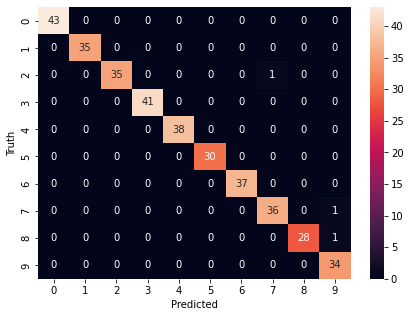

In [28]:
# building the cunfussion matrix 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')